# Summary

In this notebook, we will perform Exploratory Data Analysis (EDA) and Modelling in Python. Steps:
1. Preliminary look at the data
2. Data cleaning
3. Data deep-dive understanding
4. Modelling

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [24]:
data = pd.read_csv("C:/Users/jalal/Downloads/dataset1.csv")

#  Preliminary Look and Data Cleansing

## Sample of data

In [26]:
# Showing top 5 rows of the data
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_prob
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0.65


In [27]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
data.sample(5)

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_prob
35,320.0,110.0,5.0,5.0,5.0,9.20,yes,0.88
168,293.0,97.0,2.0,2.0,4.0,7.80,yes,0.64
95,304.0,100.0,4.0,1.5,2.5,7.84,no,0.42
309,308.0,110.0,4.0,3.5,3.0,8.60,no,0.70
167,313.0,102.0,3.0,2.0,3.0,8.27,no,0.64


Observations:
1. All columns, except `research_exp` column, are numeric
2. `research_exp` column seems to contain two distinct values (yes OR no), but will confirm later
3. No obvious defect on the data (column name vs its entries), all looks good

## General Information & Missing Values

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gre_score                496 non-null    float64
 1   toefl_score              497 non-null    float64
 2   univ_ranking             498 non-null    float64
 3   motiv_letter_strength    503 non-null    float64
 4   recommendation_strength  499 non-null    float64
 5   gpa                      501 non-null    float64
 6   research_exp             505 non-null    object 
 7   admit_prob               500 non-null    float64
dtypes: float64(7), object(1)
memory usage: 31.7+ KB


Observation:
1. Data contains 8 columns with 505 rows
2. Most of the columns have missing values (except `research_exp`), they will be dropped later
3. All dtypes seem OK (appropriate), given the corresponding column name

In [30]:
# number of missing values per column
data.isna().sum()

gre_score                  9
toefl_score                8
univ_ranking               7
motiv_letter_strength      2
recommendation_strength    6
gpa                        4
research_exp               0
admit_prob                 5
dtype: int64

In [31]:
# percentage version
data.isna().sum() * 100 / len(data)

gre_score                  1.782178
toefl_score                1.584158
univ_ranking               1.386139
motiv_letter_strength      0.396040
recommendation_strength    1.188119
gpa                        0.792079
research_exp               0.000000
admit_prob                 0.990099
dtype: float64

Since number of rows with missing values are small in proportion (< 5%), we can simply drop them.

In [32]:
# if they are significant in number we can impute them
# Rule of thumb (not always correct, tho)
# Numeric col --> data['column_name'].fillna(data['column_name'].median)
# Categorical col --> data['column_name'].fillna(data['column_name'].mode)

### Drop missing values

In [35]:
# drop na values
data = data.dropna()

In [36]:
# sanity check
data.isna().sum()

gre_score                  0
toefl_score                0
univ_ranking               0
motiv_letter_strength      0
recommendation_strength    0
gpa                        0
research_exp               0
admit_prob                 0
dtype: int64

Success removing NULL values! :)

## Duplicated data check

In [37]:
# number of duplicated data
data.duplicated().sum()

0

There is not duplicated row

# Data understanding

## Statistical summary

In [40]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['research_exp']

numericals = ['gre_score', 'toefl_score', 'univ_ranking', 'motiv_letter_strength','recommendation_strength','gpa','admit_prob']

In [41]:
# numerical statistical sumary
data[numericals].describe()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,admit_prob
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,316.327586,107.090517,3.118534,3.366379,3.476293,8.567241,0.719203
std,11.242104,5.934888,1.119704,0.968974,0.919244,0.598476,0.140185
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.127500,0.630000
50%,316.000000,107.000000,3.000000,3.500000,3.500000,8.560000,0.720000
75%,324.000000,111.250000,4.000000,4.000000,4.000000,9.025000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,0.970000


Observation:
* Overall, the minimum and maximum values make sense for each column
* `univ_ranking`, `motiv_letter_strength`, and `recommendation_strength` are discrete values with not that many unique values, no need to conclude its simmetricity either.
* Mean ~ 50% (Median) in `gre_score`, `toefl_score`, `admit_prob`, and `gpa` ccolumn, indicating somewhat a symmetrical distribution

In [42]:
# describe method on categorical data
data[categoricals].describe()

,research_exp
count,464
unique,2
top,yes
freq,252


Observations:
* `research_exp` have 2 unique value, 'yes', and 'no'
* student most have research_exp (252 rows), and the rest have no research experience.

In [44]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of research_exp column
yes    252
no     212
Name: research_exp, dtype: int64 



# Univariate Analysis

## Boxplot to detect outliers

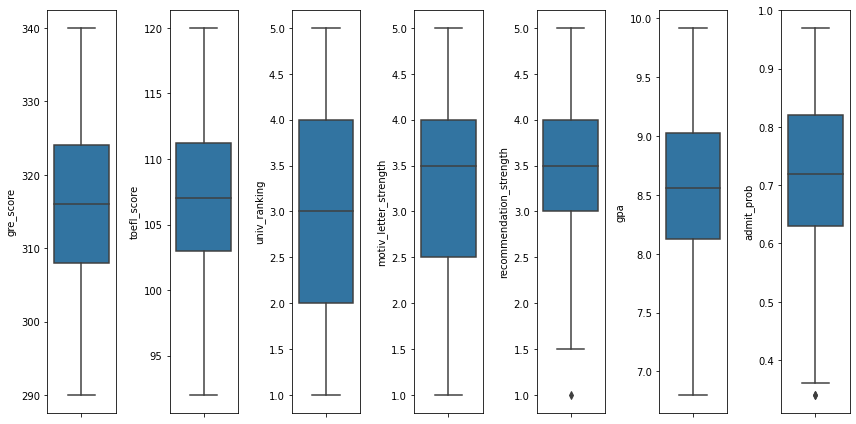

In [46]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='tab:blue')
    plt.tight_layout()

In [47]:
outlier = data['recommendation_strength'].min()

data[data['recommendation_strength'] == outlier]

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_prob
347,299.0,94.0,1.0,1.0,1.0,7.34,no,0.42


Obervation:
1. There is one outlier in the `recommendation_strength` column (value = 1)
2. But the value is still reasonable (NOT that extreme), hence no need to handle speficically

## KDE plot for knowing the distribution form

C:\Users\jalal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jalal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jalal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

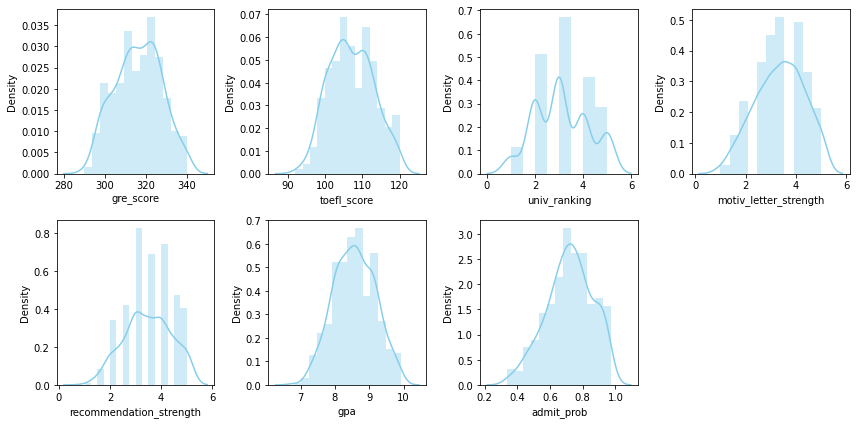

In [48]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:
1. We can ignore interpreting feature columns with limited discrete values such as `univ_ranking`, `motiv_letter_strength`, and `recommendation_strength` 
2. The true continuous numeric features: `gre_score`, `toefl_score`, `admit_prob`, and `gpa` are somewhat symmetric, which  is good (no need to transform them to approximate normal distribution)

# Bivariate Analysis

In [49]:
# remember the dataset
data.head()

,gre_score,toefl_score,univ_ranking,motiv_letter_strength,recommendation_strength,gpa,research_exp,admit_prob
0,337.0,118.0,4.0,4.5,4.5,9.65,yes,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,yes,0.76
2,316.0,104.0,3.0,3.0,3.5,8.00,yes,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,yes,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,no,0.65


<AxesSubplot:xlabel='admit_prob', ylabel='research_exp'>

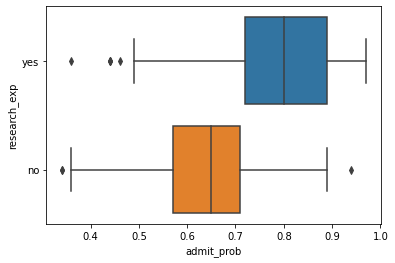

In [52]:
# research_exp affect admit_prob?
sns.boxplot(data=data,
            x='admit_prob',
            y='research_exp')

From the grap above, we can say that applicants with research experience is more likely to be admitted.

<AxesSubplot:>

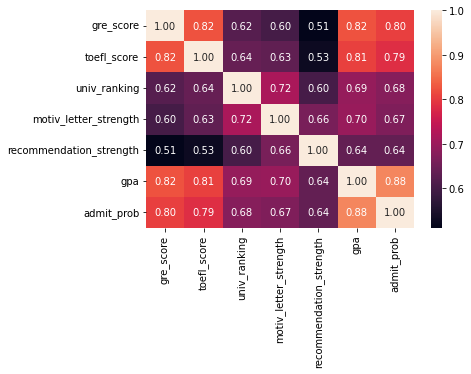

In [53]:
# correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

1. `toefl_score`, `gre_score`, and `gpa` are highly correlated each other
2. choose either of them for modelling because they are redundant

# EDA Conclusion
1. The data does not contain major issues. There are only some NULL values and duplicated rows. We've handled them accordingly.
2. Overall, the minimum and maximum values make sense for each column.
3. Most of the columns with continuous numerical values are somewhat symmetric already.
4. From the boxplot we can see outlier in `recommendation_strength` column. But it makes sense, because the min and max value are 1 and 5, the outlier is at "1", and it's possible (no need to drop)
5. From boxplot of `admit_prob` and `research_exp` column,  We can say that, applicants with research experience is more likely to be admitted.
6. From correlation heatmap: We can see that `gre_score` is correlated with `gpa` and `toefl_score`. We can choose either of them for modelling.

# Modelling

In [64]:
# split train test
from sklearn.model_selection import train_test_split


data.replace({'research_exp':{'yes':1,'no':0}},inplace=True )
feature = data.drop(columns='admit_prob')
target = data[['admit_prob']]

feature_admit_train, feature_admit_test, target_admit_train, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=42)

C:\Users\jalal\AppData\Local\Temp\ipykernel_53060\1857286501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'research_exp':{'yes':1,'no':0}},inplace=True )


### Multicollinearity Study

Variance Inflation Factor
- Multicollinearity: when two or more features/predictors are highly correlated with each other
- This can cause coefficients of estimates become unreliable
- i.e. little change in the training data leads to completely different learned coefficients
- We can detect this by computing Variance Inflation Factor (VIF) for each feature

- On a high level: VIF feature j will be high if j can be predicted using the rest of other
features. Vice versa
- VIF == 1 → No multicollinearity
- VIF between 4 and 10 → Moderate multicollinearity
- VIF > 10 → Severe multicollinearity

In [66]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,gre_score,4.176649
2,toefl_score,3.822985
3,univ_ranking,2.646590
4,motiv_letter_strength,2.863134
5,recommendation_strength,2.177612
6,gpa,4.743525
7,research_exp,1.518018


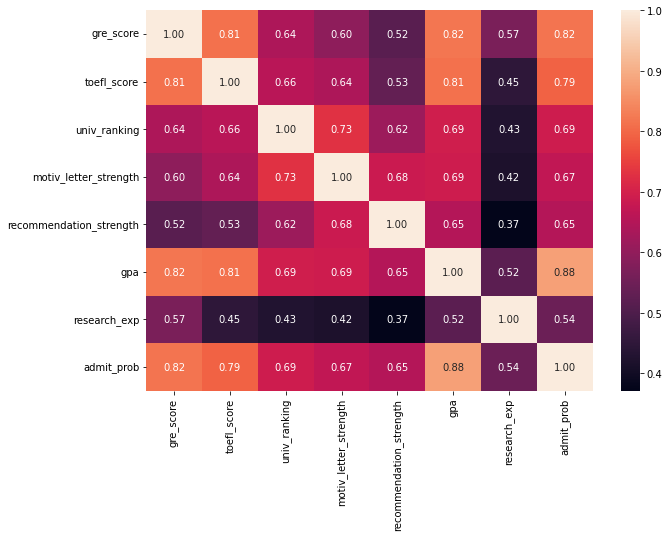

In [67]:
# heatmap correlation
admit_train = pd.concat([feature_admit_train, target_admit_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

- We found that gre_score, toefl_score, and gpa are highly correlated each other
- We decide to include only gpa to represent these three features Because it is the most correlated with the target variable

Need to drop:
* gre_score
* toefl_score

In [68]:
feature_admit_train = feature_admit_train.drop(columns=['gre_score','toefl_score']) 
feature_admit_test = feature_admit_test.drop(columns=['gre_score','toefl_score'])

### Recheck VIF

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,univ_ranking,2.553664
2,motiv_letter_strength,2.811756
3,recommendation_strength,2.148793
4,gpa,2.646828
5,research_exp,1.388674


Good!

## Model Training

In [70]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_admit_train = feature_admit_train.to_numpy()
y_admit_train = target_admit_train.to_numpy()

multi_reg.fit(X_admit_train, y_admit_train)

LinearRegression()

In [71]:
# retrieve the coefficients
# show as a nice dataframe

data = feature_admit_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,-0.744196
1,univ_ranking,0.012826
2,motiv_letter_strength,0.002837
3,recommendation_strength,0.014235
4,gpa,0.157569
5,research_exp,0.029326


Sample coeff interpretation:

An increase of 1 point in GPA, while the other features are kept fixed, is associated with an increase of 0.161 point in admit_prob

## Model Diagnostic

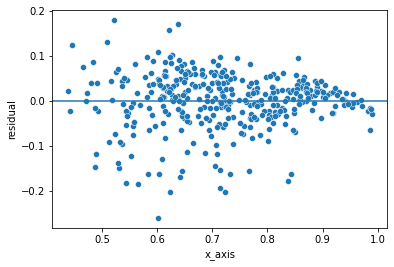

In [78]:
# calculate residuals
y_predict_train = multi_reg.predict(X_admit_train)
residual = y_admit_train - y_predict_train

#preprocess shape
y_predict_train = np.array([value for nested_array in y_predict_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


- Linear relationship
- No constant variance
- Independent observations

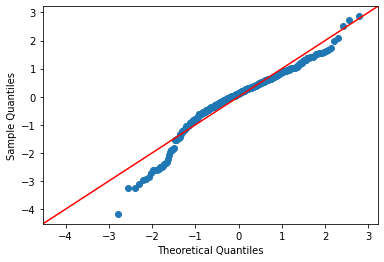

In [79]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

Normal

## Model Evaluation

### Training Error

In [74]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_admit_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_admit_train))))

R-squared for training data is 0.7445463975296229
RMSE for training data is 0.06251707268033031


R2 score measures portion of variability of the target variable that is successfully explained (modelled) by the features included in the model
- The higher == the better

Interpretation: 79.86% of variability of admit_prob is successfully explained
using all the features in the model

### Testing Error

In [81]:
# prepare prediction result on test data
X_admit_test = feature_admit_test.to_numpy()
y_predict_test = multi_reg.predict(X_admit_test)

# ground truth target
y_admit_test = target_admit_test.to_numpy()

In [82]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_admit_test))))

RMSE for testing data is 0.06732390009433725


○ The standard deviation of prediction errors is 0.0567 which means that from the regression line, the residuals mostly deviate between +- 0.058